In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense,Flatten,Lambda,Dropout

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


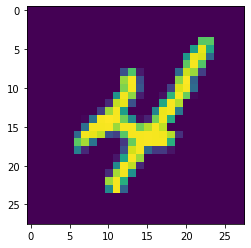

In [5]:
plt.imshow(X_train[9])

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_train.max()

255

In [9]:
X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [11]:
X_train[0].shape

(28, 28, 1)

In [12]:
 input_shape = X_train[0].shape

In [13]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size = (3,3), activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [15]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [16]:
history = model.fit(X_train,y_train, batch_size=128,epochs=10, verbose=1, validation_data=(X_test,y_test))

Epoch 1/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2490 - accuracy: 0.9249 - val_loss: 0.0578 - val_accuracy: 0.9813
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0888 - accuracy: 0.9735 - val_loss: 0.0420 - val_accuracy: 0.9861
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0679 - accuracy: 0.9797 - val_loss: 0.0320 - val_accuracy: 0.9893
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0557 - accuracy: 0.9831 - val_loss: 0.0290 - val_accuracy: 0.9907
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0480 - accuracy: 0.9846 - val_loss: 0.0265 - val_accuracy: 0.9910
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0419 - accuracy: 0.9866 - val_loss: 0.0295 - val_accuracy: 0.9900
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0359 - accuracy: 0.9889 - val_loss: 0.0285 - val_accuracy: 0.9902
Epoch 

In [17]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0277 - accuracy: 0.9916


[0.027747701853513718, 0.991599977016449]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


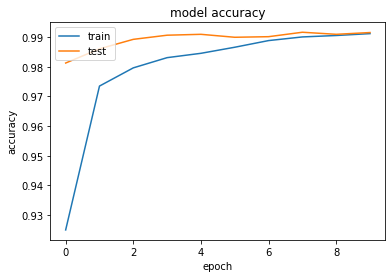

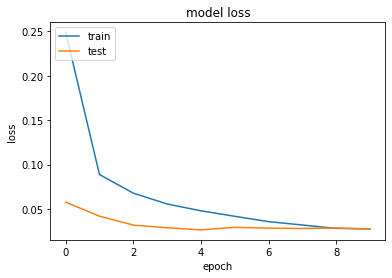

In [19]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()